# Exploring factors that influence educational outcomes with hypertools

### Load in libraries needed for the project

In [9]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

### Read in the data

In [10]:
data = pd.read_csv('data/education.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Let's separate out our variable of interest - student performance

In [11]:
performance = data.pop('Class')

### Plot the data 

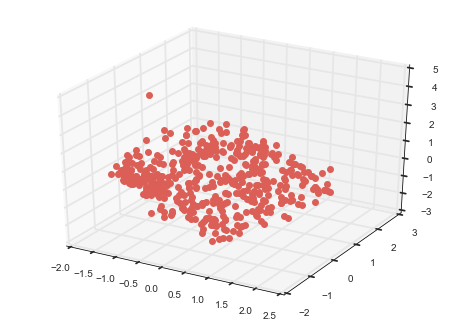

In [12]:
hyp.plot(data,'o', normalize='across')

### Now let's plot the data colored by student performance, H=high, M=middle, L=low

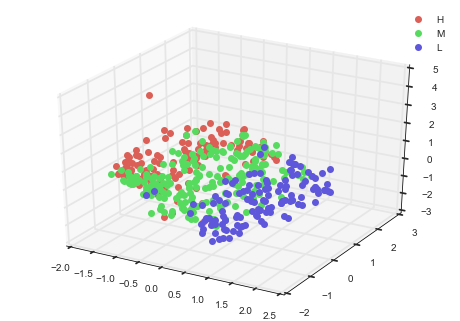

In [13]:
hyp.plot(data,'o', group=performance, legend=list(set(performance)), normalize='across')

There appears to be a relationship between at least one of our PCs and student performance.  Note the gradient from low to high performance along the x axis.

### To explore this further, let's perform a linear regression analysis using each PC to independently predict student performance

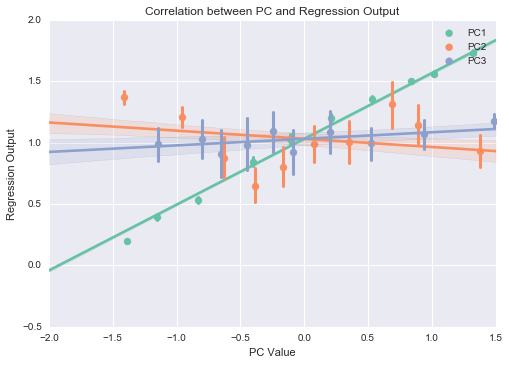

In [14]:
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set_palette(palette='Set2')

reduced_data = hyp.reduce(hyp.tools.df2mat(data), ndims=3)

linreg = linear_model.LinearRegression()
linreg.fit(reduced_data[0], performance.replace('L',0).replace('M',1).replace('H',2))

sns.regplot(x=reduced_data[0][:,0],y=linreg.predict(reduced_data[0]), label='PC1',x_bins=10)
sns.regplot(x=reduced_data[0][:,1],y=linreg.predict(reduced_data[0]), label='PC2',x_bins=10)
sns.regplot(x=reduced_data[0][:,2],y=linreg.predict(reduced_data[0]), label='PC3',x_bins=10)

plt.title('Correlation between PC and Regression Output')
plt.xlabel('PC Value')
plt.ylabel('Regression Output')
plt.legend()
plt.show()

There appears to be a strong relationship between the predicted performance of the student and the value of the first PC. On the other hand, the other 2 PCs do not appear to be related to student performance

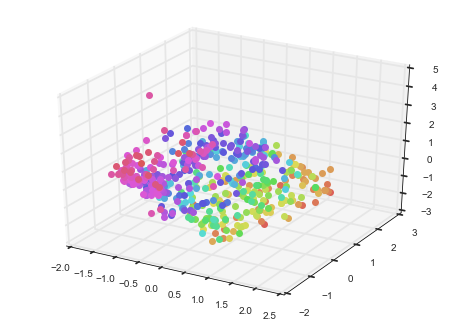

In [15]:
hyp.plot(data,'o', group=linreg.predict(reduced_data[0]), normalize='across')

### A closer look at the first PC

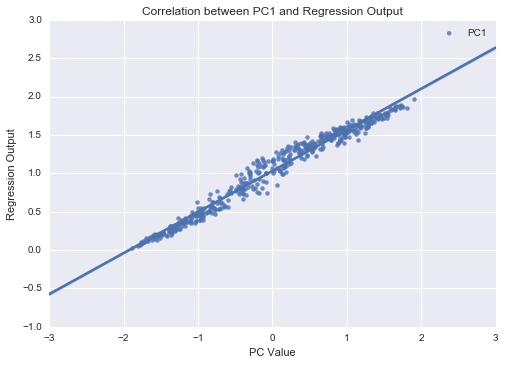

In [16]:
sns.set(style="darkgrid")
sns.regplot(x=reduced_data[0][:,0],y=linreg.predict(reduced_data[0]), label='PC1')
plt.title('Correlation between PC1 and Regression Output')
plt.xlabel('PC Value')
plt.ylabel('Regression Output')
plt.legend()
plt.show()

### And now broken down by the actual labels

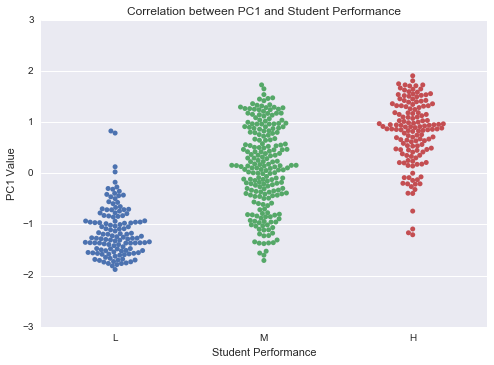

In [17]:
sns.set(style="darkgrid")
sns.swarmplot(performance,reduced_data[0][:,0],order=['L','M','H'])
plt.title('Correlation between PC1 and Student Performance')
plt.xlabel('Student Performance')
plt.ylabel('PC1 Value')
plt.show()

The higher the PC value, the better the student performs.  What are the features in the dataset that are most heavily weighted in the first PC?

### The factors that weight most heavily on the first PC

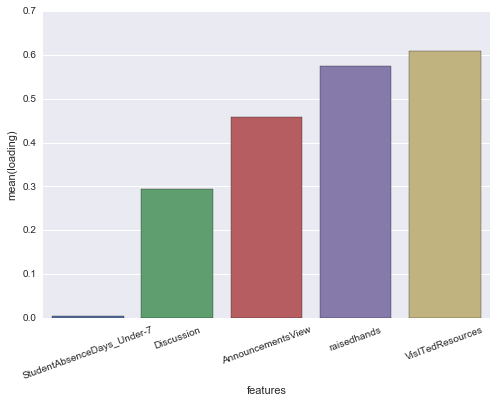

In [18]:
data_matrix,labels=hyp.tools.df2mat(data,return_labels=True)

from sklearn.decomposition import PCA
m = PCA(n_components=3)
m.fit(data_matrix)
loadings = sorted(zip(m.components_[0],labels),key =lambda x: x[0])
top = loadings[-5:]

df = pd.DataFrame(top,columns=['loading','features'])
sns.barplot(data=df,x='features',y='loading')
plt.xticks(rotation=20)
plt.show()